In [1]:
import numpy as np
import pandas as pd
import re, math
import string
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier,RidgeClassifier,PassiveAggressiveClassifier
import pickle
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from nltk.corpus import stopwords
%matplotlib inline
import seaborn as sns
import missingno
from sklearn.cluster import KMeans

In [42]:
input_df = pd.read_csv('it_dec18.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17,80,130) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
input_df = input_df.dropna(subset=["ResolvedBy"])
input_df = input_df.dropna(axis=1, how='all')
input_df = input_df[["ActualCategory","CauseCode","ClosedBy","ClosedDuration","CreatedBy","Impact","IncidentNumber",
                   "Priority","Resolution","ActualService","Source","Status","Subject","Symptom","Urgency","OwnerTeam",
                   "ResolvedBy","CustomerLocation","CreatedDateTime"]]
input_df

,ActualCategory,CauseCode,ClosedBy,ClosedDuration,CreatedBy,Impact,IncidentNumber,Priority,Resolution,ActualService,Source,Status,Subject,Symptom,Urgency,OwnerTeam,ResolvedBy,CustomerLocation,CreatedDateTime
0,Service Desk,Other,InternalServices,1884587.0,Email Listener,Medium,10527,3,"Hi Tom,\r\n\r\nIf this is still an issue, plea...",Service Desk,Email,Closed,Lumension Email Search (FW: 241188423 Lumens...,"Hi Folks,\r\n \r\n \r\n \r\nA bit an odd duck ...",Medium,Service Desk,brian.wilhelm,Milpitas,21/09/15 21:16
1,Functionality,Configuration,InternalServices,779905.0,Email Listener,Medium,10530,3,I've updated Jason's supervisor in NetSuite as...,Application Development Service,Email,Closed,Jason Shafer reporting to Jesse Kittleson,Jason Shafer reports to Jesse Kittleson and sh...,Medium,Application Development,matthew.heaford,Colorado Springs,21/09/15 23:21
4,Connectivity,Request,InternalServices,913061.0,Email Listener,Medium,10534,3,"Hi Catherine,\r\n\r\nYou should now have a rol...",Enterprise Application Service,Email,Closed,RE: Service Request# 10070 - Business Analytic...,"Brian,\r\n \r\n \r\n \r\nDo you need more info...",Medium,Application Development,brian.shepard@netmotionwireless.com,Milpitas,22/09/15 4:19
5,Accessibility,Failure,InternalServices,753090.0,Email Listener,Medium,10537,3,Access denied due to domain password expiry. T...,Service Desk,Email,Closed,Unable to access GSS Sharepoint,Hello\r\n\r\nI am not able to access GSS pages...,Medium,Service Desk,alan.beaumont,Newbury,22/09/15 6:48
6,Accessibility,Failure,InternalServices,1273256.0,Email Listener,Medium,10535,3,the necessary service did have a misconfigurat...,Service Desk,Email,Closed,Password expiration reminder emails,Hello\r\n\r\nAre the password expiration email...,Medium,Infrastructure Support,ralph.schoell,Newbury,22/09/15 6:19
7,Connectivity,Failure,InternalServices,742279.0,Email Listener,Medium,10541,3,Credential Manager hasn't updated correctly.\r...,Service Desk,Email,Closed,after changing my domain password outlook prom...,"Dear IT,\r\n \r\n \r\n \r\nIssue: outlook prom...",Medium,Service Desk,alexander.werner,Unterschleißheim,22/09/15 9:48
8,Functionality,Configuration,InternalServices,755543.0,Email Listener,Medium,10035,3,no issue. closing (Automatically Closed),Application Development Service,Email,Closed,ALERT: Infonet Intranet Site Application on CS...,Please check Solarwinds to find out about the ...,Medium,Service Desk,alan.beaumont,West Coast,09/09/15 6:07
9,Service Desk,Hardware,InternalServices,778880.0,Email Listener,NaN,10057,3,John has already been provided a plantronics b...,Service Desk,Email,Closed,Phone for John Trovas,"Hello,\r\n \r\n \r\n \r\nDo we have any phones...",NaN,Service Desk,bill.daniel,"Scottsdale, AZ",09/09/15 17:12
10,Connectivity,Session Reset,InternalServices,952578.0,Email Listener,Medium,10107,3,Melissa Chicoine and Sam Hughes were reporting...,Server Administration,Email,Closed,VCD: Endpoints Disconnected Again,1. The following are currently disconnected:\r...,Medium,Infrastructure Support,matt.wheeler,"Scottsdale, AZ",10/09/15 17:42
11,How-To,Request,InternalServices,951298.0,Email Listener,Medium,10125,3,"Vince,\r\nI have added Aaron to RM\r\nHere is ...",Data Service,Email,Closed,RM accesss for Aaron.Zhu,Please create an RM account Aaron Zhu and put ...,Medium,Application Development,al.sugarman,Milpitas,10/09/15 23:45


ActualCategory
CauseCode
ClosedBy
ClosedDateTime
ClosedDuration
CreatedBy
CreatedDateTime
Impact
Impact_Valid
IncidentNumber
IsNotification
IsVIP
IsWorkAround
LastModBy
LastModDateTime
Phone
Priority
Priority_Valid
ProfileFullName
ProfileLink_RecID
ProfileLink_Category
RecId
Resolution
Service
Service_Valid
SLA
SLALink_RecID
SLALink_Category
Source
Source_Valid
Status
Status_Valid
Subject
Symptom
Urgency
Urgency_Valid
LoginId
Owner
Owner_Valid
OwnerTeam
OwnerTeam_Valid
OwnerType
AlternateContactLink_RecID
AlternateContactLink_Category
ResolvedDateTime
ResolvedBy
HoursOfOperation
HoursOfOperation_Valid
OwnerEmail
OwnerTeamEmail
CustomerLocation
IsReportedByAlternateContact
WaitingEscLink_RecID
WaitingEscLink_Category
ClosingEscLink_RecID
ClosingEscLink_Category
AlternateContactEmail
OrganizationUnitID
ReportingOrgUnitID
TypeOfIncident
AlternateContactPhone
TeamManagerEmail
ProblemLink_Category
ProblemLink_RecID
CustomerDepartment
ActualService_Valid
ActualService
CostPerMinute
IsReclass

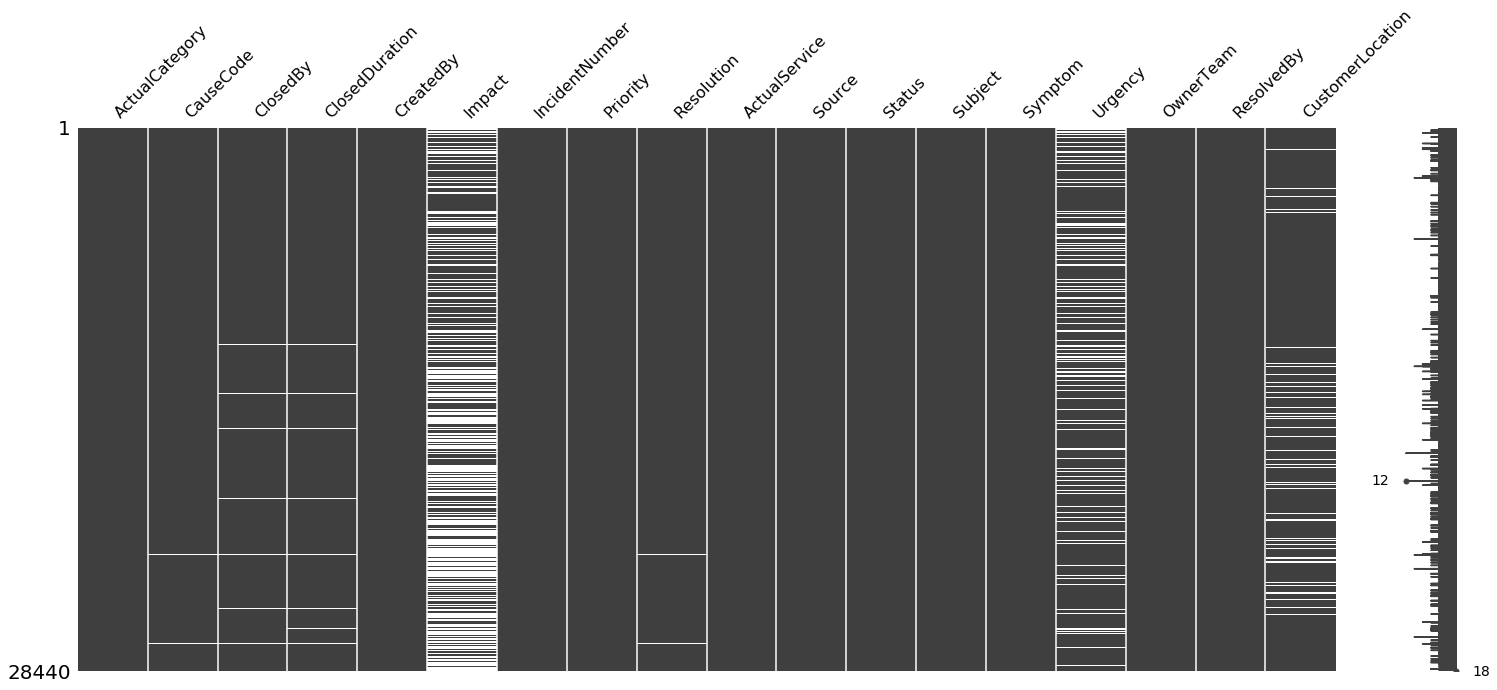

In [34]:
missingno.matrix(input_df)

In [35]:
input_df["ResolvedBy"].describe()

count             28440
unique              124
top       brian.wilhelm
freq               1489
Name: ResolvedBy, dtype: object

In [36]:
input_df['ResolvedBy'].value_counts()

brian.wilhelm          1489
alexander.werner       1205
cristina.elliott       1197
matthew.heaford        1145
sandeep.shukla         1138
keith.walcott          1133
brad.zrubek             966
Jarek.Piszczatowski     918
al.sugarman             843
Dallin.Hudson           840
james.lee               833
paul.obrien             795
matt.wheeler            781
Elisha.Gonzalez         768
padraig.morrin          753
paul.beaman             747
mark.mcneill            721
Troy.Sardi              710
Brittany.Williams       671
robert.biddlecombe      660
Michael.Kersey          577
Zhenhan.Li              534
muhammad.awais          530
michael.jackson         505
Ryan.Christensen        428
Christopher.Proud       375
Yasha.Reddy             362
Priyank.Joshi           346
ralph.schoell           343
james.whitney           335
                       ... 
Vilas.Shah                6
Bartlomiej.Frelian        5
Paul.McManus              5
jeffrey.cook              5
Brian.McCoy         

In [37]:
for i in input_df[input_df["ResolvedBy"] == "Anastasiia.Helten"]["Subject"].values:
    print(i, "\n---------\n")

App-v 5.1 from Microsoft 
---------

Product Feature Requests no longer being sent to Product Management 
---------

Need permission to send to all.lumension@heatsoftware.com d-list 
---------

FW: Quotation Q0758601 // Insight Direct (UK) Limited 
---------

FW: Straight2Bank Website changes 
---------

FW: Straight2Bank Website changes 
---------

Issue: Timeouts on qasrv01.lumension.lcl 
---------

Cannot connect to VPN 
---------

My screen doesn't refresh ? 
---------

a Support email where I set myself on BCC was blocked with the following information : Your message wasn't delivered because the recipient's e-mail provider rejected it. 
---------

Please provide access to Builds share on \\10.5.10.13 
---------

Jiveon access 
---------

Password reset 
---------

telepshere password reset 
---------

Faulty Dell 17" monitor 
---------

Lync doen't connect to the server 
---------

Roisin has DNS issues while working from home 
---------

HR system 
---------

Lync Issues 
-------

In [44]:
b = input_df.groupby(["ResolvedBy","CustomerLocation"])["IncidentNumber"].count()
b.to_csv('temp.csv')

In [45]:
table = input_df.pivot_table(values=['IncidentNumber'], index=['ResolvedBy'], columns=['CustomerLocation'],
                     aggfunc='count').fillna(0)
table

IncidentNumber                        \
CustomerLocation   's-Hertogenbosch, Netherlands + 44 (0) 192 8793 425   
ResolvedBy                                                               
Adam.Jones                                   0.0                   0.0   
Adam.Matuszak                                0.0                   0.0   
Allyson.Hunt                                 0.0                   0.0   
Anastasiia.Helten                            0.0                   0.0   
Andrew.Ariotti                               0.0                   0.0   
Andrew.Cruickshank                           0.0                   0.0   
Andrew.Fisher                                4.0                   1.0   
Angela.Link                                  0.0                   0.0   
Anish.Uppal                                  0.0                   0.0   
Ann.Runstadler                               0.0                   0.0   
Barbara.Christmann                           0.0                   0.0   
Bartlomiej.Frelian                           0.0                   0.0   
Bas.Rooij                                   26.0                   0.0   
Ben.Inness                                   0.0                   0.0   
Billy.Taylor                                 0.0                   0.0   
Brandon.Streator                             0.0                   0.0   
Brett.Erickson                               0.0                   0.0   
Brian.Korzen                                 0.0                   0.0   
Brian.McCoy                                  0.0                   0.0   
Brittany.Williams                            2.0                   0.0   
Chrissy.Amaro                                0.0                   0.0   
Christopher.Proud                            8.0                   0.0   
Clare.Bold                                   0.0                   0.0   
Craig.Shipley                                0.0                   0.0   
Dallin.Hudson                                4.0                   0.0   
Daniel.Lukens                                0.0                   0.0   
David.Crookes                                0.0                   0.0   
David.Reid                                   0.0                   0.0   
David.Smith                                  7.0                   0.0   
Elisha.Gonzalez                              4.0                   0.0   
...                                          ...                   ...   
cristina.elliott                             2.0                   0.0   
derek.murphy                                 0.0                   0.0   
eric.farlow                                  0.0                   0.0   
james.lee                                    0.0                   0.0   
james.whitney                                0.0                   0.0   
jeff.winder                                  4.0                   0.0   
jeffrey.cook                                 0.0                   0.0   
jesse.bryce                                  2.0                   0.0   
kaleb.knobel                                 0.0                   0.0   
keith.walcott                                1.0                   0.0   
larry.boedeker                               0.0                   0.0   
lorn.benson                                  0.0                   0.0   
mark.mcneill                                26.0                   0.0   
matt.wheeler                                 0.0                   0.0   
matthew.heaford                              4.0                   0.0   
melinda.applegate                            0.0                   0.0   
michael.jackson                              0.0                   0.0   
michael.taylor                               0.0                   0.0   
muhammad.awais                               1.0                   0.0   
nick.rasmussen                               0.0                   0.0   
padraig.morrin                        

In [46]:
input_df.CreatedDateTime = pd.to_datetime(input_df.CreatedDateTime)
input_df["createDay"] = input_df.CreatedDateTime.dt.weekday_name
input_df["createHour"] = input_df.CreatedDateTime.dt.hour

In [47]:
# Chi square test
contingency_table=pd.crosstab(input_df["ResolvedBy"],input_df["CustomerLocation"])
Observed_Values = contingency_table.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)

p_value=1-scipy.stats.chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

critical_value=scipy.stats.chi2.ppf(q=1-0.05,df=df)
print('critical_value:',critical_value)

chi-square statistic: 6794.976704881871
p-value: 0.0
critical_value: 3.8414588206941236


In [48]:
contingency_table

CustomerLocation,"'s-Hertogenbosch, Netherlands",+ 44 (0) 192 8793 425,+1 (801) 208-1354 x1354,+44 1344 407065,2918,602.566.5837,602.566.5838,602.566.5840,602.566.5841,801-859-8548,...,WEST-R,Warsaw,Warsaw - POL,"Warsaw, Poland",Warsaw-POL,"Wavelink Washington, Seattle",West Coast,Woking,Wroclaw,xtractionsolutions
ResolvedBy,,,,,,,,,,,,,,,,,,,,,
Adam.Jones,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adam.Matuszak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Allyson.Hunt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anastasiia.Helten,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrew.Ariotti,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrew.Cruickshank,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrew.Fisher,4,1,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
Angela.Link,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anish.Uppal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
input_df[["Subject", "Symptom", "createDay", "createHour"]]

,Subject,Symptom,createDay,createHour
0,Lumension Email Search (FW: 241188423 Lumens...,"Hi Folks,\r\n \r\n \r\n \r\nA bit an odd duck ...",Monday,21
1,Jason Shafer reporting to Jesse Kittleson,Jason Shafer reports to Jesse Kittleson and sh...,Monday,23
4,RE: Service Request# 10070 - Business Analytic...,"Brian,\r\n \r\n \r\n \r\nDo you need more info...",Tuesday,4
5,Unable to access GSS Sharepoint,Hello\r\n\r\nI am not able to access GSS pages...,Tuesday,6
6,Password expiration reminder emails,Hello\r\n\r\nAre the password expiration email...,Tuesday,6
7,after changing my domain password outlook prom...,"Dear IT,\r\n \r\n \r\n \r\nIssue: outlook prom...",Tuesday,9
8,ALERT: Infonet Intranet Site Application on CS...,Please check Solarwinds to find out about the ...,Wednesday,6
9,Phone for John Trovas,"Hello,\r\n \r\n \r\n \r\nDo we have any phones...",Wednesday,17
10,VCD: Endpoints Disconnected Again,1. The following are currently disconnected:\r...,Friday,17
11,RM accesss for Aaron.Zhu,Please create an RM account Aaron Zhu and put ...,Friday,23


In [50]:
vectorizer = TfidfVectorizer( lowercase=True, sublinear_tf=True,ngram_range=(1,1),min_df=3,max_df=0.90,
                              stop_words='english')

X_train = vectorizer.fit_transform(input_df['Subject'])
k = 125
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=125, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
input_df["cluster_output"] = model.labels_

<class 'pandas.core.frame.DataFrame'>


<Container object of 125 artists>

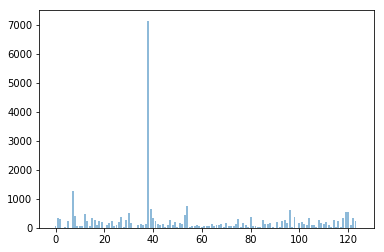

In [52]:
k_labels = model.labels_
from scipy.stats import itemfreq
a = pd.DataFrame(itemfreq(k_labels))
print(type(a))
plt.bar(a[0], a[1], align='center', alpha=0.5)

In [53]:
cluster_pivot = pd.crosstab(input_df["ResolvedBy"], input_df["cluster_output"])
print(cluster_pivot.shape)
cluster_pivot

(124, 125)


cluster_output,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
ResolvedBy,,,,,,,,,,,,,,,,,,,,,
Adam.Jones,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Adam.Matuszak,0,6,1,0,1,1,0,4,1,0,...,1,0,4,5,6,7,1,1,6,0
Allyson.Hunt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anastasiia.Helten,0,0,4,0,0,1,0,10,1,3,...,0,4,0,3,2,1,0,0,7,0
Andrew.Ariotti,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Andrew.Cruickshank,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrew.Fisher,1,0,0,0,0,0,0,13,4,0,...,0,0,0,0,0,0,0,0,0,0
Angela.Link,0,0,9,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,5
Anish.Uppal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
cluster_pivot.idxmax(axis=1)

ResolvedBy
Adam.Jones             38
Adam.Matuszak          38
Allyson.Hunt           38
Anastasiia.Helten      38
Andrew.Ariotti         39
Andrew.Cruickshank     38
Andrew.Fisher          38
Angela.Link            38
Anish.Uppal            19
Ann.Runstadler         52
Barbara.Christmann     38
Bartlomiej.Frelian     19
Bas.Rooij              38
Ben.Inness             38
Billy.Taylor           22
Brandon.Streator       16
Brett.Erickson         38
Brian.Korzen           38
Brian.McCoy            38
Brittany.Williams      38
Chrissy.Amaro          80
Christopher.Proud      38
Clare.Bold            115
Craig.Shipley           7
Dallin.Hudson          38
Daniel.Lukens          30
David.Crookes          38
David.Reid             38
David.Smith            47
Elisha.Gonzalez        38
                     ... 
cristina.elliott       38
derek.murphy           43
eric.farlow            38
james.lee              38
james.whitney          38
jeff.winder            38
jeffrey.cook           38
j

In [55]:
a=[]
for i in cluster_pivot.values:
    a = np.argsort(i)
    print(a[-5:])

[ 39 120 104  98  38]
[ 15 123 111 120  38]
[ 33  32  45 124  38]
[ 27 123   7  54  38]
[ 8 94  2 38 39]
[87 74 29 80 38]
[10  8 39  7 38]
[124  39   2  54  38]
[ 34  33  45 124  19]
[ 12  75 104  38  52]
[ 33  32  45 124  38]
[124  78   7  39  19]
[85 29 39  7 38]
[114  41  80  29  38]
[112  43   7  47  22]
[54 38 78 39 16]
[ 39  80   7 108  38]
[  7  87   8 103  38]
[ 33  32  45 124  38]
[ 22  95 109  12  38]
[ 33  45 124  38  80]
[39 80 74  7 38]
[ 33  32  45 124 115]
[ 33  46 124   7  38]
[ 96   7 120  53  38]
[ 32 124  38  96  30]
[ 33  32  45 124  38]
[ 10 111  39   7  38]
[ 7 40 50 38 47]
[  1 119   7  98  38]
[30  7  8 12 38]
[44 36 29  7 38]
[ 33  32  45 124  38]
[ 37 108 118  39  38]
[110 120  29  91  96]
[19 22 30 12 38]
[30  7 23 47 38]
[111  93  36   7  38]
[ 43  18   7  38 106]
[ 33  45 124  80  38]
[ 33  32  45 124  38]
[  7  80 101  39  38]
[34 33 32 45 93]
[34 33 32 92  7]
[ 96 120   7 119  38]
[ 30 104   7  16  38]
[74  7 57 31 38]
[ 39   8  42 122  38]
[93 29 30  5 3

In [56]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i, end='\t')
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind], end=',')
    print()

Top terms per cluster:
Cluster 0:	offline,printer,agent,emss,cr,az,2nd,41,center,outlook,
Cluster 1:	okta,log,access,reset,unable,verify,working,salesforce,mfa,need,
Cluster 2:	change,sfdc,manager,netsuite,request,salesforce,need,address,customer,owner,
Cluster 3:	stops,beijing,search,support,sfdc,office,working,evaluation,eva,eval,
Cluster 4:	webex,login,account,unable,ivanti,anymore,fails,issue,working,deactivated,
Cluster 5:	machine,built,new,virtual,build,rdp,access,unable,desktop,install,
Cluster 6:	attempt,servers,logon,using,ld,getting,key,failed,password,access,
Cluster 7:	access,drive,need,unable,folder,share,request,heat,tfs,shared,
Cluster 8:	error,message,salesforce,trying,sfdc,entitlement,outlook,getting,netsuite,fulfillment,
Cluster 9:	jive,access,login,myheatconnect,account,need,authentication,request,accounts,working,
Cluster 10:	visual,studio,subscription,license,access,msdn,expired,enterprise,unable,help,
Cluster 11:	request,fulfill,waiting,service,information,moreinf

In [57]:
for i in input_df[input_df["cluster_output"] == 0]["Subject"].values:
    print(i, "\n---------\n")

EMSS Agents Offline 
---------

CR 39 offline 
---------

The last agent in the pool is offline 
---------

CS-GMPE02 offline 
---------

Galway office Printer 3005ci is offline 
---------

Printer Filderstadt 2nd center MP2550CSP offline 
---------

Milpitas is offline with Lync 
---------

print job not working, appears as offline 
---------

FW: is az-lemss offline? 
---------

Lync is showing me offline sometimes for hours 
---------

2nd center Ricoh MP 2550CSP Offline 
---------

Printer Filderstadt 2nd center MP 2550 CSP offline 
---------

Printer Filderstadt 2nd center Ricoh MP 2550CSP Offline 
---------

Printer 2nd center Ricoh MP 2550CSP Offline 
---------

Polycom Speaker Phone The Latin Quarter Offline 
---------

Printer offline 
---------

HEAT EMSS Agent is Offline 
---------

My workstation is offline after the 21-23 July power outage 
---------

Main Ethernet Offline and Wireless Network (Firecrest) Down 
---------

CR-41 is offline 
---------

Zhang Yi's outlook is 

In [58]:
cluster_pivot.values[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [59]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (",".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [60]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 20
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=50, learning_method='online', learning_offset=50.,random_state=0).fit(X_train)
no_top_words = 5
display_topics(lda, vectorizer.get_feature_names(), no_top_words)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
vcloud,getting,approval,desktop,power
Topic 1:
outlook,domain,migration,open,able
Topic 2:
access,drive,machine,network,cloud
Topic 3:
working,file,wifi,expired,landesk
Topic 4:
issue,screen,manager,lab,iphone
Topic 5:
password,reset,email,emails,agent
Topic 6:
sap,printer,number,print,code
Topic 7:
login,ivanti,error,license,community
Topic 8:
vpn,log,issues,lync,connection
Topic 9:
folder,created,vsts,need,orders
Topic 10:
request,com,service,portal,support
Topic 11:
dl,dsm,wavelink,download,changes
Topic 12:
laptop,new,windows,start,notification
Topic 13:
skype,office,work,workday,business
Topic 14:
phone,connect,problem,working,mail
Topic 15:
netsuite,sfdc,access,sf,report
Topic 16:
change,test,needed,ns,frs
Topic 17:
salesforce,help,server,update,opportunity
Topic 18:
okta,lumension,order,missing,list
Topic 19:
webex,account,locked,merge,setup


In [61]:
x = lda.transform(X_train)
y = x.argmax(axis=1)
b = pd.DataFrame(y,columns=["Topic"])
b.Topic.value_counts()

10    2128
15    2094
13    2072
12    2041
14    1923
8     1778
5     1699
7     1622
16    1532
17    1468
2     1383
19    1290
1     1261
18    1174
0     1056
9     1023
3      855
6      723
11     700
4      618
Name: Topic, dtype: int64

In [62]:
pd.crosstab(input_df.ResolvedBy, b.Topic)

Topic,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ResolvedBy,,,,,,,,,,,,,,,,,,,,
Adam.Jones,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0
Adam.Matuszak,8,5,5,8,3,9,4,5,15,4,10,3,8,10,7,8,6,7,3,3
Allyson.Hunt,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Anastasiia.Helten,4,2,5,4,2,8,5,8,13,5,10,6,12,9,5,8,9,6,5,8
Andrew.Ariotti,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1
Andrew.Cruickshank,1,1,0,0,0,3,3,0,0,1,0,2,2,4,1,3,1,2,2,1
Andrew.Fisher,3,1,4,4,4,4,3,7,6,2,3,2,6,9,8,3,4,4,1,7
Angela.Link,8,3,13,2,3,9,5,14,10,8,12,5,6,8,15,2,3,12,5,7
Anish.Uppal,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_train, labels))

Estimated number of clusters: 108
